In [23]:
import pandas as pd

car_names_df = pd.read_csv('Car name.csv')
car_specs_df = pd.read_json('car.json')

print(car_names_df.head())
print(car_specs_df.head())

print("Length of car_names_df:", len(car_names_df))
print("Length of car_specs_df:", len(car_specs_df))

if len(car_names_df) == len(car_specs_df):
    car_specs_df['car_name'] = car_names_df['car_name']

    print("\nMerged Data:")
    print(car_specs_df.head())

    car_specs_df.to_csv('cleaned_vehicle_data.csv', index=False)
    print("Data has been successfully merged and saved!")
else:
    print("Error: The number of rows in car_names_df and car_specs_df do not match.")


                    car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino
    mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1
Length of car_names_df: 398
Length of car_specs_df: 398

Merged Data:
    mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino
Data h

In [24]:
#Data Preprocessing
#Checking for missing values, filling them, and feature engineering.

car_specs_df['hp'] = pd.to_numeric(car_specs_df['hp'], errors='coerce')
car_specs_df['wt'] = pd.to_numeric(car_specs_df['wt'], errors='coerce')

print(car_specs_df.isnull().sum())
car_specs_df.fillna(method='ffill', inplace=True)

car_specs_df['power_to_weight_ratio'] = car_specs_df['hp'] / car_specs_df['wt']
print(car_specs_df.head())


mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64
    mpg  cyl   disp     hp    wt   acc  yr  origin                   car_name  \
0  18.0    8  307.0  130.0  3504  12.0  70       1  chevrolet chevelle malibu   
1  15.0    8  350.0  165.0  3693  11.5  70       1          buick skylark 320   
2  18.0    8  318.0  150.0  3436  11.0  70       1         plymouth satellite   
3  16.0    8  304.0  150.0  3433  12.0  70       1              amc rebel sst   
4  17.0    8  302.0  140.0  3449  10.5  70       1                ford torino   

   power_to_weight_ratio  
0               0.037100  
1               0.044679  
2               0.043655  
3               0.043694  
4               0.040591  


<ipython-input-24-19f1eec335b3>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  car_specs_df.fillna(method='ffill', inplace=True)


Descriptive Statistics:
              mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.178392  2970.424623   
std      7.815984    1.701004  104.269838   38.294837   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   75.000000  2223.750000   
50%     23.000000    4.000000  148.500000   92.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  power_to_weight_ratio  
count  398.000000  398.000000  398.000000             398.000000  
mean    15.568090   76.010050    1.572864               0.034832  
std      2.757689    3.697627    0.802055               0.005930  
min      8.000000   70.000000    1.000000               0.020557  
25%     13

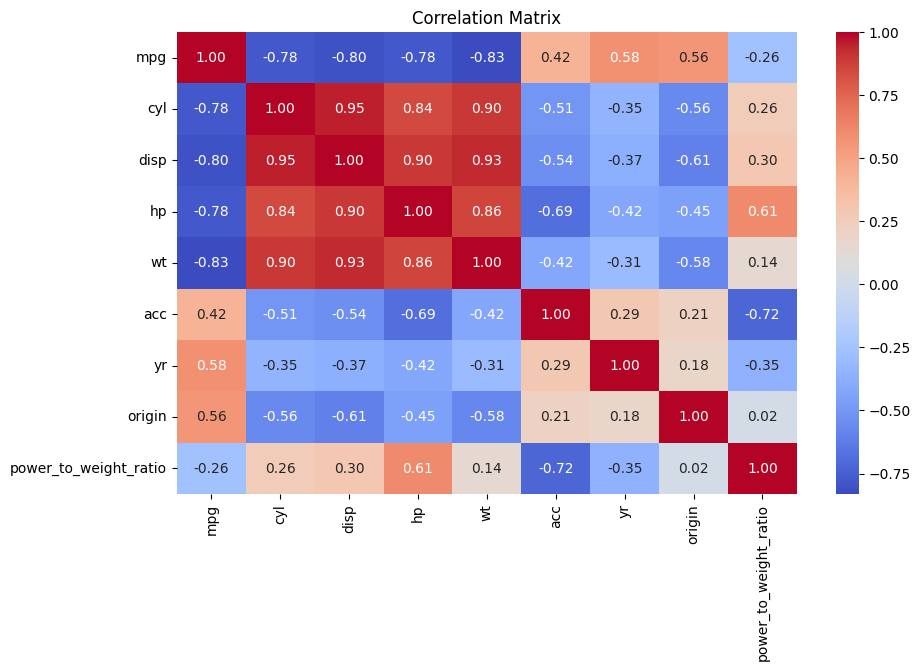

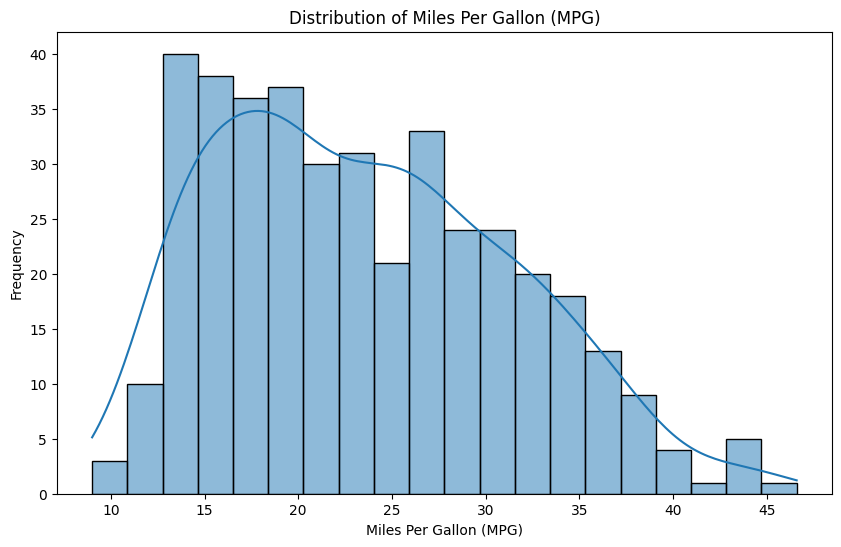

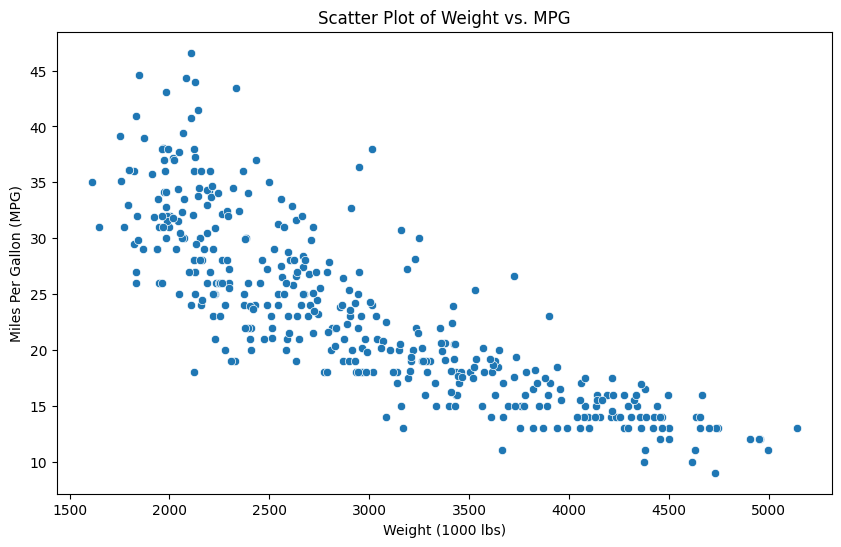

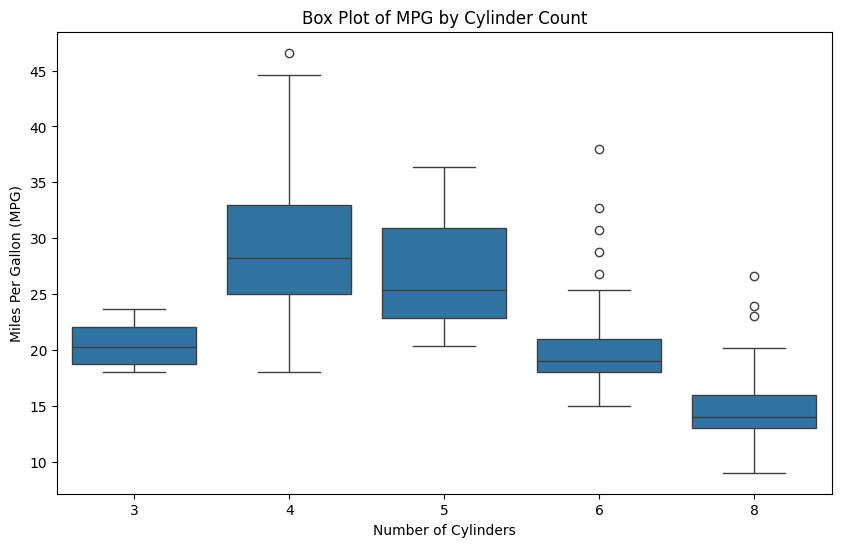

In [25]:
# (EDA)
#Visualizing distributions and relationships between variables.

import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = car_specs_df.select_dtypes(include=[float, int])

# Descriptive statistics
print("Descriptive Statistics:")
print(numeric_cols.describe())

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualizing the distribution of 'mpg'
plt.figure(figsize=(10, 6))
sns.histplot(car_specs_df['mpg'], bins=20, kde=True)
plt.title('Distribution of Miles Per Gallon (MPG)')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to analyze relationship between weight and mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wt', y='mpg', data=car_specs_df)
plt.title('Scatter Plot of Weight vs. MPG')
plt.xlabel('Weight (1000 lbs)')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

# Boxplot to analyze the distribution of mpg across different cylinder counts
plt.figure(figsize=(10, 6))
sns.boxplot(x='cyl', y='mpg', data=car_specs_df)
plt.title('Box Plot of MPG by Cylinder Count')
plt.xlabel('Number of Cylinders')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()



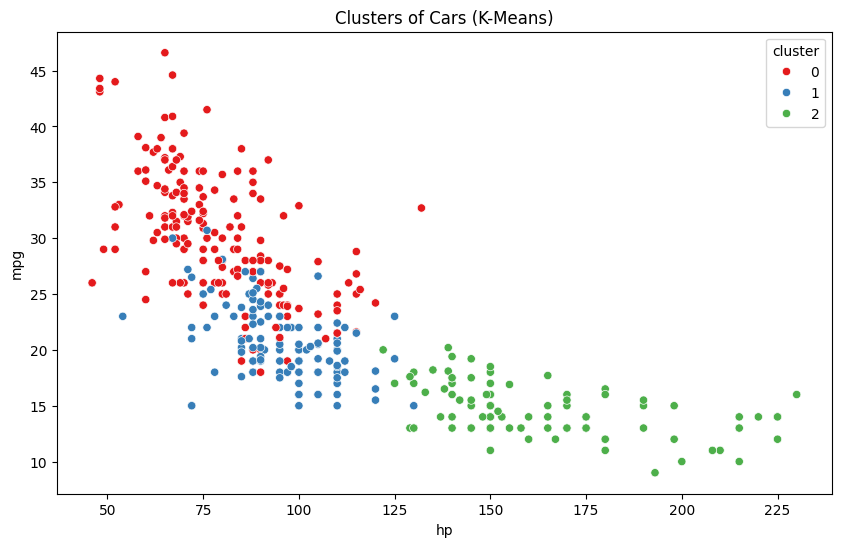

cluster
0    185
1    115
2     98
Name: count, dtype: int64


In [26]:
#Unsupervised Learning (Clustering)
#Performing K-Means clustering to group cars.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = car_specs_df[['mpg', 'hp', 'wt', 'power_to_weight_ratio']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
car_specs_df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', hue='cluster', data=car_specs_df, palette='Set1')
plt.title('Clusters of Cars (K-Means)')
plt.show()

print(car_specs_df['cluster'].value_counts())


Mean Squared Error: 13.30
R-squared: 0.75

Coefficients of the Regression Model:
                       Coefficient
hp                        0.188050
wt                       -0.014364
power_to_weight_ratio  -800.258331


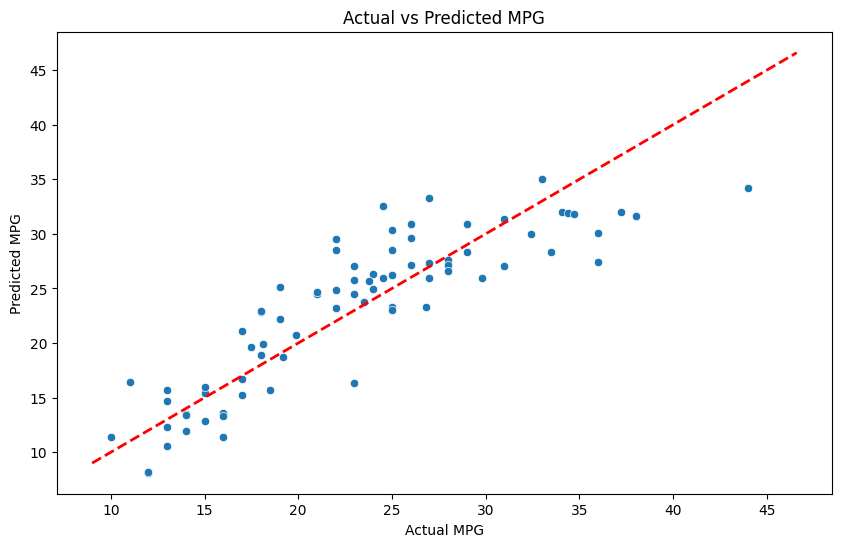

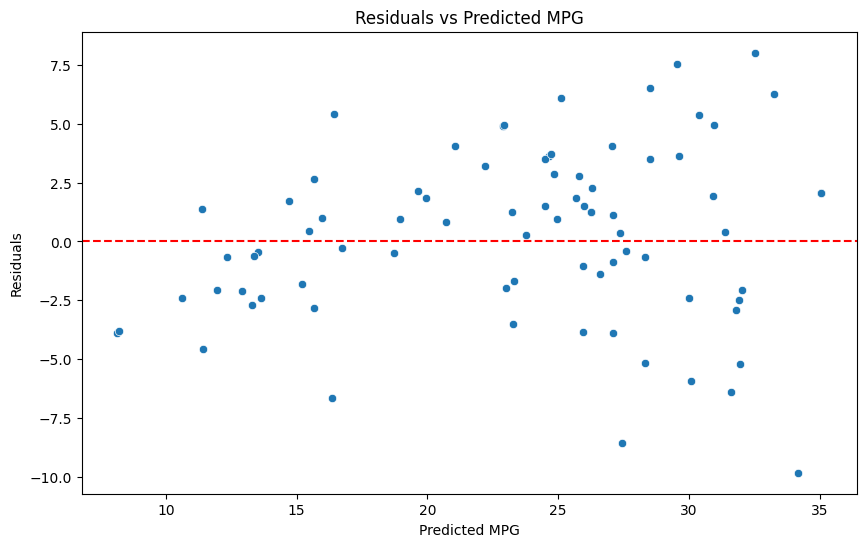

In [27]:
# Supervised Learning (Regression)
# Building a regression model to predict mpg.

# Splitting data
X = car_specs_df[['hp', 'wt', 'power_to_weight_ratio']]
y = car_specs_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


coefficients = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the Regression Model:")
print(coefficients)

#actual vs predicted mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)
plt.title('Actual vs Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=y_pred - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted MPG')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.show()
